In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
customers=pd.read_csv('C:\\Project1\\Ecommerce Customers.csv')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


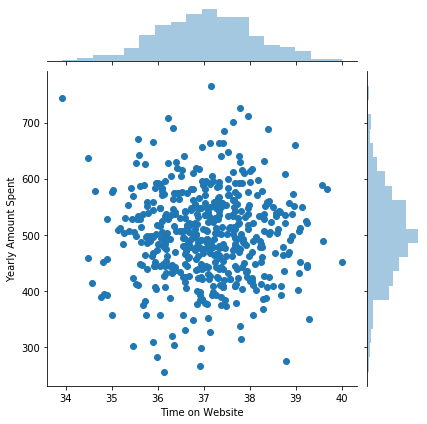

In [8]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

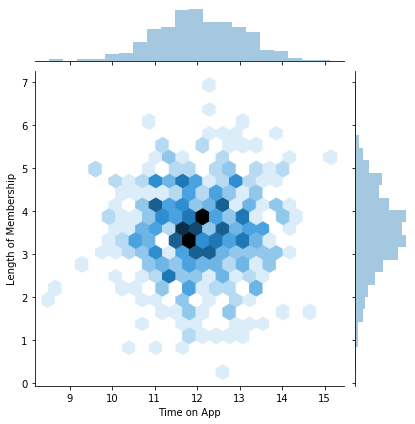

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

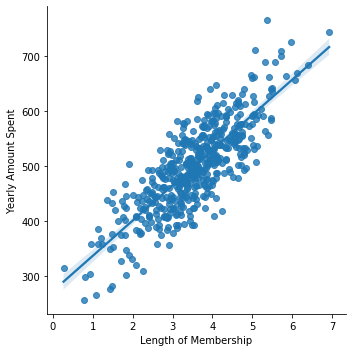

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [12]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Text(0, 0.5, 'prediction value')

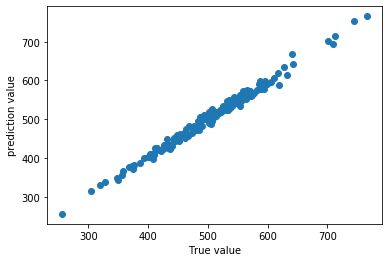

In [25]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('True value')
plt.ylabel('prediction value')

In [27]:
from sklearn import metrics

In [28]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE 7.228148653430838
MSE 79.81305165097461
RMSE 2.6885216483098735


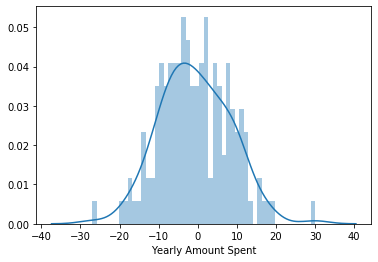

In [29]:
sns.distplot((y_test-predictions),bins=50)

In [30]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
